### Juan Pablo Fonseca Correa - 138263
## Ejercicio de Perceptrón (con BD de SVM)

In [8]:
# importamos librerías
import pandas as pd
import numpy as np
from scipy import sparse
from sys import maxint
from math import pow
from math import fabs
from __future__ import division
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
from random import uniform

In [9]:
df = pd.read_csv('andSVM_2.csv') # leo la bd
%matplotlib inline
X = df[df.columns[0:-1]] # dividimos la base en su X y su clasificación y
y = df[df.columns[-1]]
p=2 # el tamaño de cada vector X es 2 (X1,X2)
df # mostramos la tabla

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,2,3,1
5,3,2,1
6,0,-1,0


In [10]:
def g(x, coeff): # transfer function
    ret = 0
    for i in range(0,p+1):
        ret += coeff[i]*x[i]
    if ret >= 0:
        ret = 1
    else:
        ret = 0
    return ret

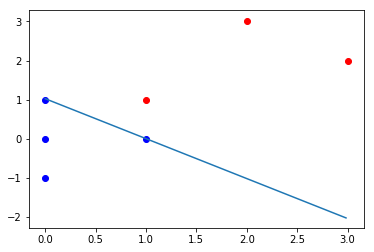

In [11]:
w = [1 for i in range(0,p+1)] # inicializo las w's
eta = 0.01
for k in range (0,1000):
    for i in range (0,len(X)):
        xi0 = [1]
        xidemas=[X.iloc[i][j] for j in range(0,p)]
        xi = xi0 + xidemas
        yi = y[i]
        error_actual = yi - g(xi,w)
        for j in range(len(w)):
            w[j] = w[j] + eta * error_actual * xi[j] # actualizo w's
            
#y = 0 (forma burda de dividir los puntos)
plt.scatter(X.iloc[:3,0],X.iloc[:3,1],color='blue')
plt.scatter(X.iloc[6,0],X.iloc[6,1],color='blue')

#y = 1
plt.scatter(X.iloc[3:6,0],X.iloc[3:6,1],color='red')

x1 = np.linspace(0, 3, 200, endpoint=False)
plt.plot(x1,-(w[0]/w[2])-(w[1]/w[2])*x1)
plt.show()

##### Se puede ver que la frontera de decisión sí divide exitosamente entre los dos tipos de datos. Esto se logró ya que los datos son separables linealmente.